In [1]:
import numpy as np
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.Encapsulation import *
from src.Linear import *
from src.NonLinear import *
from src.Loss import *
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)


X_train, y_train = load_usps("data/USPS_train.txt")
X_test, y_test = load_usps("data/USPS_test.txt")
y_train_encode = OneHotEncoder().fit_transform(y_train.reshape(-1, 1)).toarray()
y_test_encode = OneHotEncoder().fit_transform(y_test.reshape(-1, 1)).toarray()

In [3]:
activation_list=[
    (TanH(),Sigmoid()),
    (TanH(),Softmax()),
    (TanH(),ReLU()),
    (ReLU(),TanH()),
    (ReLU(),Sigmoid()),
    (ReLU(),Softmax()),
    (Sigmoid(),ReLU()),
    (Sigmoid(),TanH()),
    (Sigmoid(),Softmax()),
    (TanH(),TanH()),
    (ReLU(),ReLU()),
    (Sigmoid(),Sigmoid())]
score_list=[]
activation_list_x=[
    "TanH-Sigmoid",
    "TanH-Softmax",
    "TanH-RELU",
    "RELU-TanH",
    "RELU-Sigmoid",
    "RELU-Softmax",
    "Sigmoid-RELU",
    "Sigmoid-TanH",
    "Sigmoid-Softmax",
    "TanH-TanH",
    "RELU-RELU",
    "Sigmoid-Sigmoid"
]

In [4]:
for (act1,act2) in activation_list:

    encoder = [Linear(256,100),act1,Linear(100,64),act2,Linear(64,10),Softmax()]

    network_usps=Sequential(encoder)
    optim_usps=Optim(network_usps,MseLoss(),eps=1e-3)
    results_df=optim_usps.SGD_eval(X_train,y_train_encode,32,100,True)
    score=optim_usps.score(X_test,y_test_encode)
    score_list.append(score)



Batch:   0%|          | 0/205 [00:00<?, ?it/s]

Batch:   0%|          | 0/205 [00:00<?, ?it/s]


In [5]:
score_list

[0.9197807673143996,
 0.5769805680119582,
 0.9003487792725461,
 0.9332336821126059,
 0.9192825112107623,
 0.4369706028898854,
 0.9053313403089188,
 0.9207772795216741,
 0.4479322371699053,
 0.9347284504235177,
 0.9237668161434978,
 0.8186347782760339]

In [6]:
list_x=[i for i in range(len(score_list))]
list_x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

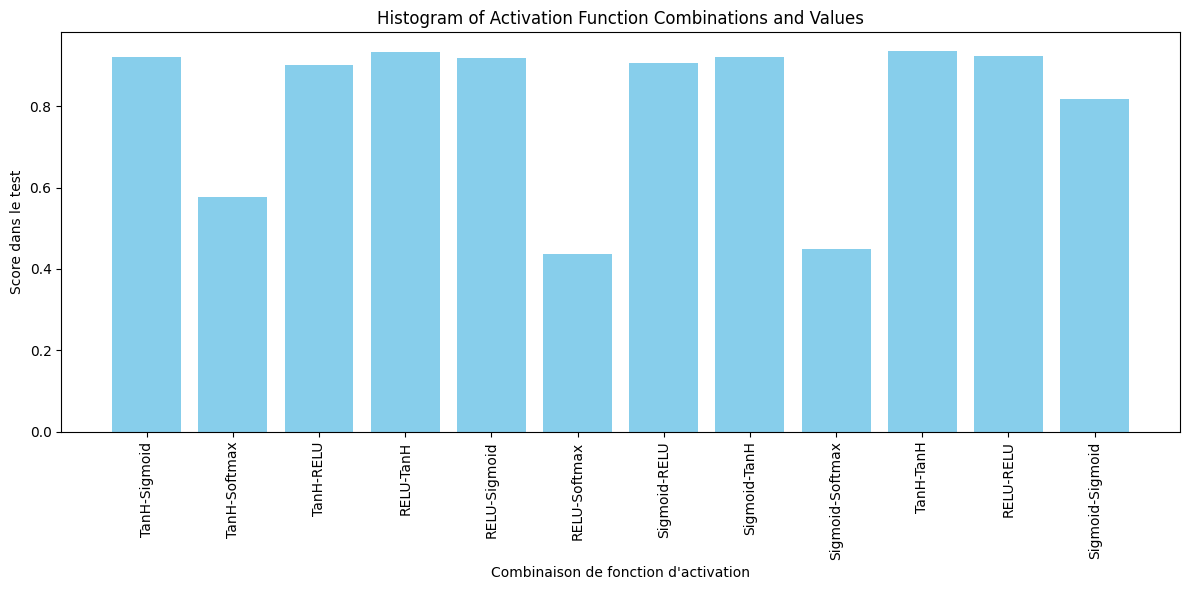

In [7]:
plt.figure(figsize=(12, 6))
plt.bar(activation_list_x, score_list, color='skyblue')
plt.xlabel("Combinaison de fonction d'activation")
plt.ylabel("Score dans le test")
plt.title('Histogram of Activation Function Combinations and Values')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout to make room for rotated labels